In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Seaborn es una librería de Python para visualización de datos basada en matplotlib. Provee una interface de alto nivel para crear graficos estadísticos informativos y atractivos.

[seaborn homepage](https://seaborn.pydata.org/index.html)

# Volados #

Vamos a empezar analizando que tan bien se pueden echar volados usando python. Para lo cual necesitamos un generador de números aleatorios. Un paquete que da algunas funciones para lograr dicho objetivo es el siguiente:

In [5]:
import random

Ahora vamos a definir una función que genere 100 números aleatorios en el intervalo $[0,1)$ y contará cuantos cumplen que su valor sea menor o igual a $1/2$. Para lo cual usaremos la función random(), ver [random.](https://docs.python.org/3/library/random.html)

In [26]:
def soles():
    s = 0
    for i in range(100):
        if random.random() <= 0.5:
            s+=1
    return s

In [29]:
for i in range(10):
    print(soles())

49
59
59
49
51
44
50
57
53
49


Ahora sería interesante determinar cuántos soles aparecen en varios ensayos de 100 volados. La siguiente función nos permitirá realizar esta prueba.

In [30]:
def volados(n):
    ensayos = []
    for i in range(n):
        ensayos.append(soles())
    return(sum(ensayos)/n)

In [31]:
volados(10),volados(10^2),volados(10^3),volados(10^4),volados(10^5)

(50.3, 51.0, 50.111111111111114, 50.42857142857143, 49.733333333333334)

In [32]:
volados(10),volados(10^2),volados(10^3),volados(10^4),volados(10^5)

(49.2, 49.0, 48.888888888888886, 49.857142857142854, 49.666666666666664)

Idealmente deberíamos obtener 50 soles y  50 águilas. Sin embargo los resultados anteriores no dejan del todo claro que nuestro generador de aleatorios cumpla con el caso ideal. Además inspeccionar números no parece ser una buena estrategia.

Así, podemos crear un histograma que nos muestre cuantos soles obtenemos al lanzar $100$ volados, luego $200,\ldots,100000$ 

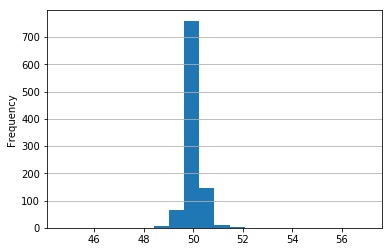

In [12]:
d=[]
for i in range(1,1000):
    d.append(volados(i))

data=pd.Series(d)
data.plot.hist(grid=True, bins=20)
plt.grid(axis='x')

El resultado indica que en la gran mayoría de los ensayos se obtienen cerca de 50 soles.

# Vinos #

In [ ]:
import csv

In [ ]:
with open("winemag-data-130k-v2.csv", "r", encoding="latin-1") as f:
    wines = list(csv.reader(f))

In [ ]:
wines[:]

In [ ]:
vinos=[]

In [ ]:
for l in wines:
    vinos.append(l[4])

In [ ]:
vinos.pop(0)

In [ ]:
scores = [float(w) for w in vinos]

In [ ]:
from numpy import *
import matplotlib.pyplot as plt

In [ ]:
mean(scores)

In [ ]:
std(scores)

In [ ]:
plt.hist(scores)
plt.show()

In [ ]:
for w in wines:
    if(w[4])

# Housing #

In [ ]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
promedio = df['Price'].mean()

In [ ]:
promedio

In [ ]:
mediana= df['Price'].median()

In [ ]:
mediana

In [ ]:
desvest= df['Price'].std()

In [ ]:
desvest

In [ ]:
sns.set(style="whitegrid")

In [ ]:
plt.figure(figsize=(10,8))

In [ ]:
ax = sns.boxplot(x='Price', data=df, orient="v")

In [ ]:
ax = sns.boxplot(x='Type', y='Price', data=df, orient="v")

In [ ]:
filter_data = df.dropna(subset=['Price'])

In [ ]:
plt.figure(figsize=(14,8))

In [ ]:
sns.distplot(filter_data['Price'], kde=False)

In [ ]:
type_counts = df['Type'].value_counts()

In [ ]:
type_counts

In [ ]:
{'house_type': type_counts}

In [ ]:
df2 = pd.DataFrame({'house_type': type_counts}, 
                     index = ['t', 'h', 'u']
                   )

In [ ]:
df2

In [ ]:
df2.plot.pie(y='house_type', figsize=(10,10), autopct='%1.1f%%')

In [ ]:
sns.set(style='darkgrid')

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Regionname', data=df)

# Revistas científicas #

In [ ]:
rc = pd.read_csv("scimagojr2018PhysicsandAstronomy.csv",delimiter=";", decimal=",")

In [57]:
rc.head()

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Quartile,H index,Total Docs. (2018),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Publisher,Coverage,Categories
0,1,29719,Reviews of Modern Physics,journal,"00346861, 15390756",17.337,Q1,298,42,127,14771,4952,120,37.78,351.69,United States,American Physical Society,1929-ongoing,Physics and Astronomy (miscellaneous) (Q1)
1,2,4000151822,Nature Physics,journal,17452473,9.515,Q1,233,335,889,8799,11422,637,16.44,26.27,United Kingdom,Nature Publishing Group,2006-ongoing,Physics and Astronomy (miscellaneous) (Q1)
2,3,29229,Physics Reports,journal,03701573,8.684,Q1,248,41,174,13662,4313,172,27.99,333.22,Netherlands,Elsevier BV,1971-ongoing,Physics and Astronomy (miscellaneous) (Q1)
3,4,28677,Living Reviews in Relativity,journal,14338351,7.304,Q1,75,7,13,3063,256,13,24.20,437.57,Germany,Albert Einstein Institut,2000-ongoing,Physics and Astronomy (miscellaneous) (Q1)
4,5,21100201772,Physical Review X,journal,21603308,6.497,Q1,86,280,609,18225,8117,589,12.09,65.09,United States,American Physical Society,2011-ongoing,Physics and Astronomy (miscellaneous) (Q1)


In [ ]:
rc.info()

In [38]:
docsProm=rc['Total Docs. (2018)'].mean()
docsDesvest=rc['Total Docs. (2018)'].std()
docsMax=rc['Total Docs. (2018)'].max()
docsMin=rc['Total Docs. (2018)'].min()

In [39]:
docsProm,docsDesvest

(364.8501872659176, 1296.7689517851188)

In [40]:
docsDesvest

1296.7689517851188

In [41]:
docsMax

14424

In [42]:
docsMin

0

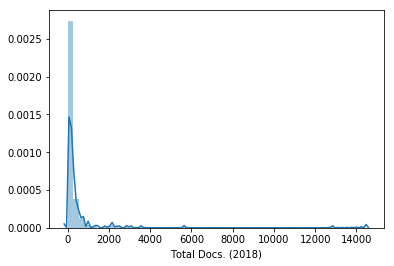

In [32]:
sns.distplot(rc['Total Docs. (2018)'])

In [33]:
t=pd.DataFrame({'docs':rc['Total Docs. (2018)']})

In [53]:
t.mean()[0]

364.8501872659176

In [64]:
def momBasicos(l):
    m=[]
    t=pd.DataFrame({'temp':l})
    m.append(t.mean()[0])
    m.append(t.median()[0])
    m.append(t.std()[0])
    m.append(t.max()[0])
    m.append(t.min()[0])
    return m

In [65]:
descEstTotDocs=momBasicos(rc['Total Docs. (2018)'])

In [66]:
descEstTotDocs

[364.8501872659176, 91.0, 1296.7689517851188, 14424, 0]

In [70]:
rc['H index'].describe()

count    267.000000
mean      51.985019
std       69.423565
min        0.000000
25%       13.000000
50%       31.000000
75%       55.500000
max      567.000000
Name: H index, dtype: float64

In [67]:
descEstHindex=momBasicos(rc['H index'])

In [68]:
descEstHindex

[51.98501872659176, 31.0, 69.42356482971083, 567, 0]

In [61]:
rc.loc[rc['H index'].idxmax()]

Rank                                                              11
Sourceid                                                       29150
Title                                        Physical Review Letters
Type                                                         journal
Issn                                              10797114, 00319007
SJR                                                            3.571
SJR Quartile                                                      Q1
H index                                                          567
Total Docs. (2018)                                              2883
Total Docs. (3years)                                            7687
Total Refs.                                                   131076
Total Cites (3years)                                           66449
Citable Docs. (3years)                                          7363
Cites / Doc. (2years)                                            9.2
Ref. / Doc.                       

In [62]:
rc.loc[rc['H index'].idxmin()]

Rank                                                                    252
Sourceid                                                        21100786456
Title                                                Philosophical Magazine
Type                                                                journal
Issn                                                               00318086
SJR                                                                   0.124
SJR Quartile                                                             Q4
H index                                                                   0
Total Docs. (2018)                                                        0
Total Docs. (3years)                                                      1
Total Refs.                                                               0
Total Cites (3years)                                                      0
Citable Docs. (3years)                                                    1
Cites / Doc.

## Grafica circular ##

In [ ]:
tipos = rc['Type'].value_counts()

In [ ]:
tipos

In [ ]:
{'Tipo_revista': tipos}

In [ ]:
rc2 = pd.DataFrame({'Tipo_revista': tipos}, 
                   index = ['journal', 'conference and proceedings', 'book series', 'trade journal'])

In [ ]:
rc2

In [ ]:
rc2.plot.pie(y='Tipo_revista', figsize=(10,10), autopct='%1.1f%%')

## Grafica de conteos ##

In [ ]:
filter_data = rc.dropna(subset=['Total Docs. (2018)'])

In [ ]:
plt.figure(figsize=(10,7))#ancho,alto
ax = sns.countplot(x='Country', data=rc)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()